In [1]:
import pandas as pd

/var/folders/zp/c97k147160ddnklbfc2rk3hr0000gn/T/ipykernel_8178/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# customer - geoloc

In [2]:
geoloc = pd.read_csv('data_powerbi/olist_geolocation_dataset.csv')

group = geoloc.groupby(['geolocation_state'])
display(group['geolocation_state'].count())

group.get_group('RO')

geolocation_state
AC      1301
AL      4183
AM      2432
AP       853
BA     36045
CE     11674
DF     12986
ES     16748
GO     20139
MA      7853
MG    126336
MS     10431
MT     12031
PA     10853
PB      5538
PE     16432
PI      4549
PR     57859
RJ    121169
RN      5041
RO      3478
RR       646
RS     61851
SC     38328
SE      3563
SP    404268
TO      3576
Name: geolocation_state, dtype: int64

/var/folders/zp/c97k147160ddnklbfc2rk3hr0000gn/T/ipykernel_8178/36832489.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  group.get_group('RO')


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
812609,76804,-8.758144,-63.887973,porto velho,RO
812610,76820,-8.758315,-63.871762,porto velho,RO
812611,76861,-9.187329,-63.192091,itapua do oeste,RO
812612,76850,-10.775093,-65.317970,guajara-mirim,RO
812613,76804,-8.764428,-63.891509,porto velho,RO
...,...,...,...,...,...
816082,76919,-11.171901,-61.538673,ministro andreazza,RO
816083,76940,-11.725296,-61.771534,rolim de moura,RO
816084,76965,-11.424926,-61.432493,cacoal,RO
816085,76964,-11.435609,-61.441914,cacoal,RO


In [3]:
customers = pd.read_csv('data_powerbi/olist_customers_dataset.csv')
geoloc = pd.read_csv('data_powerbi/olist_geolocation_dataset.csv', usecols=['geolocation_zip_code_prefix','geolocation_lat', 'geolocation_lng'])

geoloc.drop_duplicates(subset=['geolocation_zip_code_prefix'], inplace=True)

data = pd.merge(customers, geoloc, left_on='customer_zip_code_prefix', right_on="geolocation_zip_code_prefix", how='left')
data.drop(columns=['customer_zip_code_prefix'], inplace=True)
data['geolocation_lat'].fillna(0, inplace=True)
data['geolocation_lng'].fillna(0, inplace=True)
data['geolocation_zip_code_prefix'].fillna(0, inplace=True)
data.head()

/var/folders/zp/c97k147160ddnklbfc2rk3hr0000gn/T/ipykernel_8178/1457301190.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['geolocation_lat'].fillna(0, inplace=True)
/var/folders/zp/c97k147160ddnklbfc2rk3hr0000gn/T/ipykernel_8178/1457301190.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409.0,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790.0,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151.0,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775.0,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056.0,-22.987222,-47.151073


In [4]:
data.isna().sum()

customer_id                    0
customer_unique_id             0
customer_city                  0
customer_state                 0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

# ajout orders

In [5]:
orders = pd.read_csv('data_powerbi/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
data = pd.merge(data, orders, left_on='customer_id', right_on='customer_id', suffixes=[None, None])
data.geolocation_zip_code_prefix = data.geolocation_zip_code_prefix.fillna(0).astype(int)

print(data.shape)
display(data.head())

(99441, 14)


,customer_id,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


# ajout review

In [6]:
review = pd.read_csv('data_powerbi/olist_order_reviews_dataset.csv', usecols=['order_id', 'review_score'])


review.drop_duplicates(subset=['order_id'], inplace=True)
data = pd.merge(data, review, left_on='order_id', right_on='order_id', how='left')
data.review_score = data.review_score.fillna(-1).astype(int)

print(data.shape)
data.head()

(99441, 15)


,customer_id,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5


# ajout order_items

In [7]:
order_item = pd.read_csv('data_powerbi/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

data = pd.merge(data, order_item, left_on='order_id', right_on='order_id', how='left')
data.order_item_id = data.order_item_id.fillna(-1).astype(int)

print(data.shape)
data.head()

(113425, 21)


,customer_id,customer_unique_id,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,5,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


# ajout sellers

In [8]:
seller = pd.read_csv('data_powerbi/olist_sellers_dataset.csv')

data = pd.merge(data, seller, left_on='seller_id', right_on='seller_id', how='left')
data.seller_zip_code_prefix = data.seller_zip_code_prefix.fillna(-1).astype(int)

data = pd.merge(data, geoloc, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', suffixes=('', '_seller'))
data.drop(columns=['seller_id', 'geolocation_zip_code_prefix_seller'], inplace=True)
data.rename(columns={
  'geolocation_lat_seller': 'seller_geolocation_lat', 
  'geolocation_lng_seller': 'seller_geolocation_lng',
  'geolocation_lat': 'customer_lat',
  'geolocation_lng': 'customer_lng',
  'geolocation_zip_code_prefix': 'customer_zip_code',
  }, inplace=True)

print(data.shape)
data.head()

(112397, 25)


,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,...,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,a9516a079e37a9c9c36b9b78b10169e8,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP,-23.482623,-46.374490
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,1,4aa6014eceb682077f9dc4bffebc05b0,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC,-26.912429,-48.677381
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,1,bd07b66896d6f1494f5b86251848ced7,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP,-23.482623,-46.374490
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,1,a5647c44af977b148e0a3a4751a09e2e,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP,-23.482623,-46.374490
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,1,9391a573abe00141c56e38d84d7d5b3b,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP,-21.766477,-48.831547


# ajout payments

In [9]:
payment = pd.read_csv('data_powerbi/olist_order_payments_dataset.csv')

data = pd.merge(data, payment, left_on='order_id', right_on='order_id', how='left')
data.fillna({'payment_sequential': -1, 'payment_installments': -1}, inplace=True)
data = data.astype({'payment_sequential': int, 'payment_installments': int})

print(data.shape)
data.head()

(117343, 29)


,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,...,freight_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,21.88,8577,itaquaquecetuba,SP,-23.482623,-46.374490,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,46.48,88303,itajai,SC,-26.912429,-48.677381,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,17.79,8577,itaquaquecetuba,SP,-23.482623,-46.374490,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,23.36,8577,itaquaquecetuba,SP,-23.482623,-46.374490,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,22.25,14940,ibitinga,SP,-21.766477,-48.831547,1,credit_card,8,252.25


# ajout products

### Traduction

In [10]:
product = pd.read_csv('data_powerbi/olist_products_dataset.csv')
translates = pd.read_csv('data_powerbi/product_category_name_translation.csv', index_col='product_category_name').to_dict()
translates['product_category_name_english']
product.product_category_name = product.product_category_name.map(translates['product_category_name_english'])

### merge

In [11]:
data = pd.merge(data, product, left_on='product_id', right_on='product_id', how='left')
data.fillna({'product_weight_g': -1}, inplace=True)
data = data.astype({'product_weight_g': int})
data.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

print(data.shape)
data.head()

(117343, 34)


,customer_id,customer_unique_id,customer_city,customer_state,customer_zip_code,customer_lat,customer_lng,order_id,order_status,order_purchase_timestamp,...,seller_geolocation_lng,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,14409,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,-46.374490,1,credit_card,2,146.87,office_furniture,8683,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,9790,-23.726853,-46.545746,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,...,-48.677381,1,credit_card,8,335.48,housewares,10150,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1151,-23.527788,-46.660310,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,...,-46.374490,1,credit_card,7,157.73,office_furniture,8267,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,8775,-23.496930,-46.185352,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,...,-46.374490,1,credit_card,1,173.30,office_furniture,12160,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,13056,-22.987222,-47.151073,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,...,-48.831547,1,credit_card,8,252.25,home_confort,5200,45.0,15.0,35.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117343 entries, 0 to 117342
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117343 non-null  object        
 1   customer_unique_id             117343 non-null  object        
 2   customer_city                  117343 non-null  object        
 3   customer_state                 117343 non-null  object        
 4   customer_zip_code              117343 non-null  int64         
 5   customer_lat                   117343 non-null  float64       
 6   customer_lng                   117343 non-null  float64       
 7   order_id                       117343 non-null  object        
 8   order_status                   117343 non-null  object        
 9   order_purchase_timestamp       117343 non-null  datetime64[ns]
 10  order_approved_at              117328 non-null  datetime64[ns]
 11  

# Enregistrement

In [26]:
# save = data.drop(columns=['customer_id', 'customer_unique_id', 'order_id', 'order_item_id',
#                           'product_id',
#save = data.drop(columns=['order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

save = data.copy()

#writer = pd.ExcelWriter("data_powerbi/olist_data.xlsx", engine="openpyxl")
save.to_excel("data_powerbi/olist_data.xlsx", sheet_name='Sheet1', index=False)


save.head()

In [18]:
save.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_zip_code', 'customer_lat', 'customer_lng', 'order_id',
       'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'review_score', 'order_item_id',
       'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

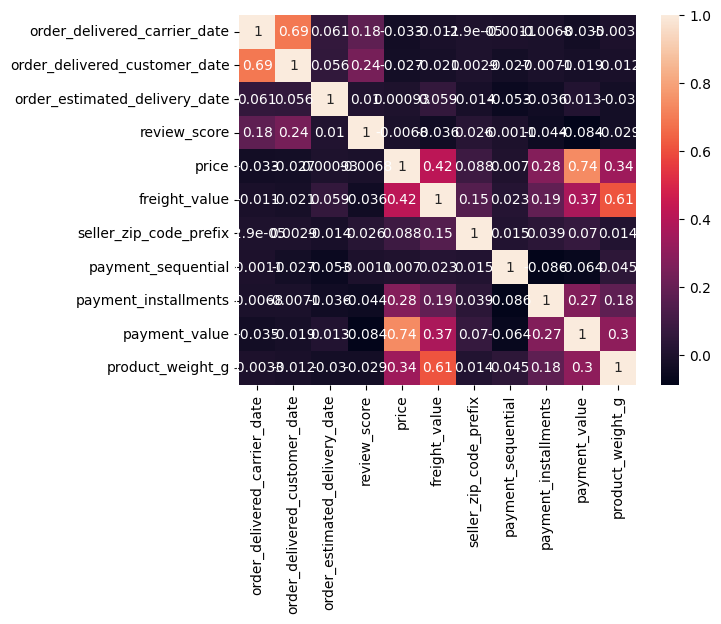

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset = save.copy()
dataset['order_delivered_carrier_date'] = dataset.order_delivered_carrier_date.values.astype(np.int64)
dataset['order_delivered_customer_date'] = dataset.order_delivered_customer_date.values.astype(np.int64)
dataset['order_estimated_delivery_date'] = dataset.order_estimated_delivery_date.values.astype(np.int64)
df = dataset.select_dtypes(include=np.number)
df.drop(columns=['customer_zip_code', 'customer_lat', 'customer_lng', 'order_item_id', 'seller_geolocation_lat', 'seller_geolocation_lng', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

hm = sns.heatmap(df.corr(), annot=True)
plt.show()